In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import cv2 as cv

In [24]:
path_classes = '../Img/'
classes_names = sorted(os.listdir(path_classes))
dic_imgs ={}

for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))
    print "class: ", name_class, " total samples: ", len(dic_imgs[classes_names[i]])

class:  Sample001  total samples:  144
class:  Sample002  total samples:  128
class:  Sample003  total samples:  108
class:  Sample004  total samples:  80
class:  Sample005  total samples:  68
class:  Sample006  total samples:  81
class:  Sample007  total samples:  78
class:  Sample008  total samples:  83
class:  Sample009  total samples:  42
class:  Sample010  total samples:  71
class:  Sample011  total samples:  669
class:  Sample012  total samples:  146
class:  Sample013  total samples:  319
class:  Sample014  total samples:  317
class:  Sample015  total samples:  679
class:  Sample016  total samples:  129
class:  Sample017  total samples:  207
class:  Sample018  total samples:  259
class:  Sample019  total samples:  60
class:  Sample020  total samples:  100
class:  Sample021  total samples:  125
class:  Sample022  total samples:  291
class:  Sample023  total samples:  229
class:  Sample024  total samples:  474
class:  Sample025  total samples:  501
class:  Sample026  total samples:

In [25]:
X=[];
Y=[];
for i in range(len(classes_names)):
    for j in range(len(dic_imgs[classes_names[i]])):

        path_image = path_classes+classes_names[i]+'/'+dic_imgs[classes_names[i]][j];
        img=cv.imread(path_image);
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB);
        img=cv.resize(img,(32,32));
        X.append(img)
        Y.append(i)

X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [26]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size)
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(6106, 32, 32, 3) (1527, 32, 32, 3) (6106,) (1527,)


In [27]:
X_train = X_train.reshape([-1, 32, 32, 3])
X_test = X_test.reshape([-1, 32, 32, 3])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [69]:
model=  keras.models.Sequential()
model.add(keras.layers.Conv2D(60, (5, 5), input_shape=(32, 32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(30, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(800, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))

model.summary();

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 60)        4560      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 30)        16230     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 30)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 1000)             

In [ ]:
opt = keras.optimizers.SGD(lr=0.005, momentum=0.7)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,
                    validation_data=(X_test, Y_test))

Train on 6106 samples, validate on 1527 samples
Epoch 1/100
6106/6106 [==============================] - 12s 2ms/sample - loss: 3.5469 - acc: 0.0789 - val_loss: 3.4901 - val_acc: 0.0982
Epoch 2/100
6106/6106 [==============================] - 10s 2ms/sample - loss: 3.4295 - acc: 0.0878 - val_loss: 3.3716 - val_acc: 0.0943
Epoch 3/100
6106/6106 [==============================] - 11s 2ms/sample - loss: 3.3357 - acc: 0.0940 - val_loss: 3.3191 - val_acc: 0.0989
Epoch 4/100
6106/6106 [==============================] - 10s 2ms/sample - loss: 3.3107 - acc: 0.0904 - val_loss: 3.3102 - val_acc: 0.0806
Epoch 5/100
6106/6106 [==============================] - 10s 2ms/sample - loss: 3.3072 - acc: 0.0915 - val_loss: 3.3010 - val_acc: 0.1028
Epoch 6/100
6106/6106 [==============================] - 10s 2ms/sample - loss: 3.3035 - acc: 0.0919 - val_loss: 3.2999 - val_acc: 0.1002
Epoch 7/100
6106/6106 [==============================] - 10s 2ms/sample - loss: 3.3002 - acc: 0.0911 - val_loss: 3.2952 - va

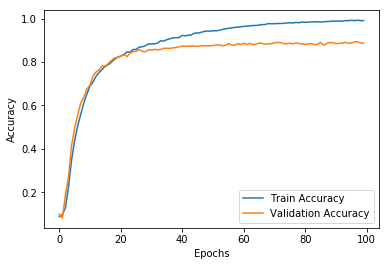

In [66]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
def indentificar(features):
    if np.argmax(features)==0:
        return 0
    if np.argmax(features)==1:
        return 1
    if np.argmax(features)==2:
        return 2
    if np.argmax(features)==3:
        return 3
    if np.argmax(features)==4:
        return 4
    if np.argmax(features)==5:
        return 5
    if np.argmax(features)==6:
        return 6
    if np.argmax(features)==7:
        return 7
    if np.argmax(features)==8:
        return 8
    if np.argmax(features)==9:
        return 9
    if np.argmax(features)==10:
        return 'A'
    if np.argmax(features)==11:
        return 'B'
    if np.argmax(features)==12:
        return 'C'
    if np.argmax(features)==13:
        return 'D'
    if np.argmax(features)==14:
        return 'E'
    if np.argmax(features)==15:
        return 'F'
    if np.argmax(features)==16:
        return 'G'
    if np.argmax(features)==17:
        return 'H'
    if np.argmax(features)==18:
        return 'I'
    if np.argmax(features)==19:
        return 'J'
    if np.argmax(features)==20:
        return 'K'
    if np.argmax(features)==21:
        return 'L'
    if np.argmax(features)==22:
        return 'M'
    if np.argmax(features)==23:
        return 'N'
    if np.argmax(features)==24:
        return 'O'
    if np.argmax(features)==25:
        return 'P'
    if np.argmax(features)==26:
        return 'Q'
    if np.argmax(features)==27:
        return 'R'
    if np.argmax(features)==28:
        return 'S'
    if np.argmax(features)==29:
        return 'T'
    if np.argmax(features)==30:
        return 'U'
    if np.argmax(features)==31:
        return 'V'
    if np.argmax(features)==32:
        return 'W'
    if np.argmax(features)==33:
        return 'X'
    if np.argmax(features)==34:
        return 'Y'
    if np.argmax(features)==35:
        return 'Z'

In [59]:
from tensorflow.keras.models import load_model
model2=load_model('my_new_model_32-sirve.h5')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 60)        4560      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 30)        16230     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)              

B


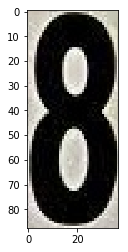

In [68]:
ima=cv.imread('../Presentación/NUMERO2.jpg')
ima=cv.cvtColor(ima,cv.COLOR_BGR2RGB)
plt.imshow(ima)
ima=cv.resize(ima,(32,32))
ima = ima.reshape([-1, 32, 32, 3])
ima = ima.astype('float32')
ima /= 255

features=model.predict(ima)
print indentificar(features)

In [41]:
model.save('my_new_model_32-1-sirve.h5')

In [50]:
model_conv = tf.keras.models.Model(inputs=model.input,outputs=model.get_layer('conv2d_6').output)

In [51]:
features_conv1 = model_conv.predict(ima)
features_conv1.shape

(1, 28, 28, 60)

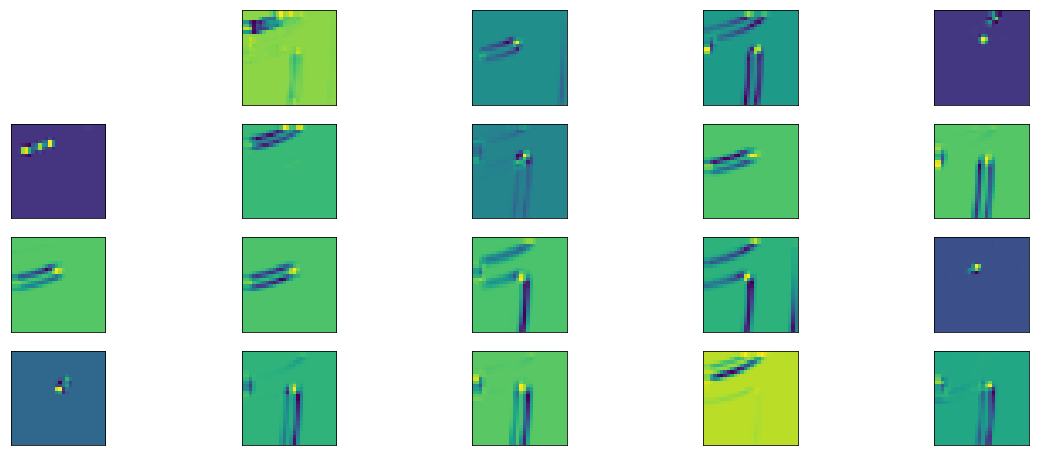

In [56]:
plt.figure(figsize=(20,8))
for i in range(1,20,1):  
  
  src=features_conv1[0,:,:,i]
  #src=cv.resize(src,(90,90), interpolation = cv.INTER_CUBIC)
  dst = cv.cornerHarris(src,2,3,0.069)
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(dst, cmap='viridis')
plt.subplot(4,5,16)
plt.xticks([])
plt.yticks([])
plt.grid(False)
